In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [195]:
## implementar a função que identifica a bandeira
## a função deve receber uma imagem e retornar a bandeira identificada
## a função deve retornar uma lista de tuplas, onde cada tupla contém as coordenadas de um dos cantos da bandeira
## [(PAIS, (x1, y2), (x2, y2)`),(PAIS, (x1, y2), (x2, y2)`),(PAIS, (x1, y2), (x2, y2)`),...]

def identifica_bandeira(img):
   # Definição das cores principais das bandeiras
    cores_bandeiras = {
        "peru": [(17, 17, 217), (255, 255, 255)],
        "monaco": [(38, 18, 206), (255, 255, 255)],
        "singapura": [(56, 41, 237), (255, 255, 255)],
        "italia": [(54, 146, 0), (255, 255, 255), (54, 43, 206)],
        "irlanda": [(98, 155, 21), (255, 255, 255), (61, 136, 254)]
    }
    
    resultado = []
    
    # Detectar contornos gerais na imagem
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, mascara_binaria = cv2.threshold(img_gray, 50, 255, cv2.THRESH_BINARY)
    contornos, _ = cv2.findContours(mascara_binaria, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    for contorno in contornos:
        x, y, w, h = cv2.boundingRect(contorno)
        if w > 50 and h > 30:  # Filtro para evitar falsos positivos
            # Extrair a região da imagem correspondente ao contorno
            roi = img[y:y+h, x:x+w]
            
            # Verificar cada país
            for pais, cores in cores_bandeiras.items():
                cores_presentes = 0
                mascaras = []
                
                # Criar máscaras para cada cor
                for cor in cores:
                    lower = np.array([max(0, c - 20) for c in cor])
                    upper = np.array([min(255, c + 20) for c in cor])
                    mascara = cv2.inRange(roi, lower, upper)
                    mascaras.append(mascara)
                    
                    # Contar pixels significativos para essa cor
                    area_cor = cv2.countNonZero(mascara)
                    area_total = w * h
                    if area_cor > 0.1 * area_total:  # Pelo menos 10% da área deve ter a cor
                        cores_presentes += 1
                
                # Se todas as cores do país estão presentes
                if cores_presentes == len(cores):
                    if not any(x1 <= x <= x2 and y1 <= y <= y2 for _, (x1, y1), (x2, y2) in resultado):
                        resultado.append((pais, (x, y), (x + w, y + h)))
                        break 
    
    return resultado




In [196]:
## nao alterar essa função
# Função para desenhar as bandeiras identificadas
def draw_bandeiras(lista_bandeiras, bgr):
    try:
        for bandeira in lista_bandeiras:
            cv2.rectangle(bgr, bandeira[1], bandeira[2], (255, 0, 0), 5)
            cv2.putText(bgr, bandeira[0], bandeira[1], cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
        return bgr
    except Exception as e:
        return bgr

[('peru', (768, 496), (1029, 671)), ('italia', (84, 477), (348, 654)), ('irlanda', (752, 114), (1018, 247))]


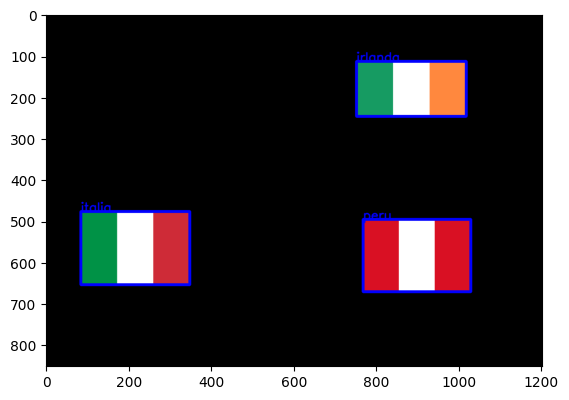

In [ ]:
## Para testar a função identifica_bandeira

# Você pode testar a função identifica_bandeira com as imagens de teste fornecidas
# 
#img = cv2.imread('img/teste1.png')
#img = cv2.imread('img/teste2.png')
#img = cv2.imread('img/teste3.png')
#img = cv2.imread('img/teste4.png')

# Chamar a função identifica_bandeira
resultado = identifica_bandeira(img)

# Imprimir o resultado da função identifica_bandeira 
print(resultado)

# Desenhar as bandeiras na imagem
bgr = draw_bandeiras(resultado, img)
plt.imshow(cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB))
plt.show()


